In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore") 

df = pd.read_csv('Cust_Personality_Analysis.csv', sep="\t")
df.head(7)

In [2]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [3]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## Data Preprocessing

### Exploring customer Enrollment date and recent purchase

In [5]:
df.Dt_Customer

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [6]:
import datetime
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)  

## Checking the first recorded date and last recorded date of customer
print (df.Dt_Customer.min())
print (df.Dt_Customer.max())

2012-01-08 00:00:00
2014-12-06 00:00:00


In [7]:
## Checking the first recorded date and last recorded date of customer
print (df.Recency.min())
print (df.Recency.max())

0
99


In [8]:
#https://stackoverflow.com/questions/18215317/extracting-days-from-a-numpy-timedelta64-value
no_of_days_as_customer = df.Dt_Customer.max() - df.Dt_Customer 
df['No_of_days_as_customer'] = no_of_days_as_customer.dt.days

From the above it looks like we have customer records starting from Aug 2012 to Dec 2014, we consider 2014 as the year of this customer data generation

### year of birth

In [9]:
df.Year_Birth.value_counts()

1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64

The above shows we have customers born in 1890s to 1900,  we consider those as outliers and drop records with birthdate before 1910


In [10]:
df[df.Year_Birth < 1910]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,No_of_days_as_customer
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,0,0,0,0,0,1,3,11,0,436
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,0,0,3,11,0,203
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,0,0,1,0,0,0,3,11,0,436


In [11]:
df = df[df.Year_Birth > 1910]
df.shape

(2237, 30)

In [12]:
df['Age'] = 2014 - df.Year_Birth

### Total purchase

In [13]:
df['Total_purchased'] =  df['MntWines'] + df['MntFruits']+ df['MntMeatProducts']+ df['MntFishProducts']+ df['MntSweetProducts']+ df['MntGoldProds']
## Checking if any customer hasnt purchased in the last 2 yrs
df[df['Total_purchased']==0].shape

(0, 32)

In [14]:
df['total_purchased_nv'] =  df['MntMeatProducts']+ df['MntFishProducts']
df[df['total_purchased_nv']== 0].shape

(0, 33)

In [15]:
df['Wines_Gold'] =  df['MntWines'] + + df['MntGoldProds']
df[df['Wines_Gold']== 0].shape

(0, 34)

In [16]:
df['Total_purchased_fruits_swts'] = df['MntFruits'] + df['MntSweetProducts']
df[df['Total_purchased_fruits_swts']==0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,No_of_days_as_customer,Age,Total_purchased,total_purchased_nv,Wines_Gold,Total_purchased_fruits_swts
22,1993,1949,PhD,Married,58607.0,0,1,2012-12-23,63,867,...,0,3,11,0,713,65,972,86,886,0
32,5710,1970,Graduation,Together,40548.0,0,1,2012-10-10,31,110,...,0,3,11,0,787,44,120,7,113,0
38,8595,1973,Graduation,Widow,42429.0,0,1,2014-11-02,99,55,...,0,3,11,0,34,41,67,8,59,0
59,8375,1968,PhD,Married,55954.0,0,1,2014-03-03,63,447,...,0,3,11,0,278,46,518,28,490,0
66,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,3,11,0,31,47,11,1,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,2632,1954,Graduation,Married,50501.0,1,1,2013-06-18,10,297,...,0,3,11,1,536,60,500,51,449,0
2205,5959,1968,Graduation,Single,35893.0,1,1,2012-10-15,80,158,...,0,3,11,0,782,46,199,23,176,0
2207,4333,1954,Graduation,Together,32144.0,1,1,2014-03-23,76,41,...,0,3,11,0,258,60,54,10,44,0
2209,6168,1963,Graduation,Divorced,45146.0,1,1,2013-07-15,28,33,...,0,3,11,0,509,51,53,5,48,0


### Education column

In [17]:
df.Education.value_counts()

Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64

In [18]:
basic_list = ['2n Cycle', '2n Cycle']
mid_list = ['Master', 'Graduation']
df["Education"] = df.apply(
    lambda x: 'basic' if x["Education"] in basic_list else ( 'mid' if x["Education"] in mid_list else 'advanced'), 
    axis=1)

### Income columns

We already noticed Income column has some null values,    
    1) we can fill those null values based on the mean of their correponding education, as the chance of being unemployed for long is not possible

In [19]:
print (df.Income.min())
print (df.Income.max())

1730.0
666666.0


In [20]:
df[df.Income.isnull()].shape

(24, 35)

#### Checking the income trend

<AxesSubplot:xlabel='Income', ylabel='Count'>

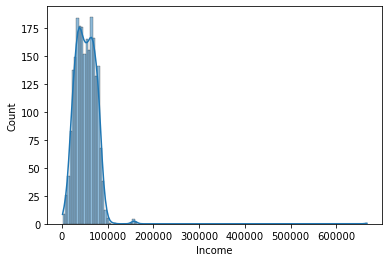

In [21]:
import seaborn as sns
sns.histplot(data=df, x="Income",  kde=True)

<AxesSubplot:xlabel='Income', ylabel='Education'>

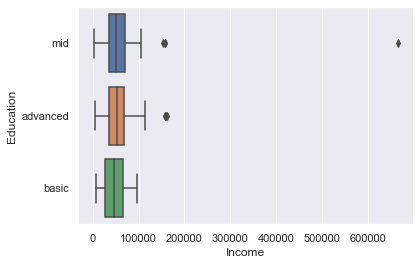

In [22]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()
sns.boxplot(data=df, x="Income", y="Education")

#### checking the number of buyers with income more than 150k

In [23]:
df[(df["Income"] > 150000)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,No_of_days_as_customer,Age,Total_purchased,total_purchased_nv,Wines_Gold,Total_purchased_fruits_swts
164,8475,1973,advanced,Married,157243.0,0,1,2014-01-03,98,20,...,0,3,11,0,337,41,1608,1583,21,4
617,1503,1976,advanced,Together,162397.0,1,1,2013-03-06,31,85,...,0,3,11,0,640,38,107,18,87,2
655,5555,1975,mid,Divorced,153924.0,0,0,2014-07-02,81,1,...,0,3,11,0,157,39,6,2,2,2
687,1501,1982,advanced,Married,160803.0,0,0,2012-04-08,21,55,...,0,3,11,0,972,32,1717,1639,59,19
1300,5336,1971,mid,Together,157733.0,1,0,2013-04-06,37,39,...,0,3,11,0,609,43,59,11,47,1
1653,4931,1977,mid,Together,157146.0,0,0,2013-04-29,13,1,...,0,3,11,0,586,37,1730,1727,2,1
2132,11181,1949,advanced,Married,156924.0,0,0,2013-08-29,85,2,...,0,3,11,0,464,65,8,3,3,2
2233,9432,1977,mid,Together,666666.0,1,0,2013-02-06,23,9,...,0,3,11,0,668,37,62,26,21,15


In [24]:
import math
df['Income'] = df.apply(lambda row: math.nan if row['Income']>150000 else row['Income'], axis=1)

In [25]:
df[df.Income.isnull()].shape

(32, 35)

In [26]:
#https://stackoverflow.com/questions/63128612/pandas-conditional-fillna-based-on-another-column-values
salary_mean_dict = {'basic': df[df['Education']== 'basic']['Income'].mean(), 
                    'mid': df[df['Education']== 'mid']['Income'].mean(), 
                    'advanced': df[df['Education']== 'advanced']['Income'].mean()
                    }

has_income_na = df['Income'].isna()
print(has_income_na)

df.loc[has_income_na, 'Income'] = df.loc[has_income_na, 'Education'].map(salary_mean_dict)
df[df.Income.isnull()]

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Name: Income, Length: 2237, dtype: bool


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,No_of_days_as_customer,Age,Total_purchased,total_purchased_nv,Wines_Gold,Total_purchased_fruits_swts


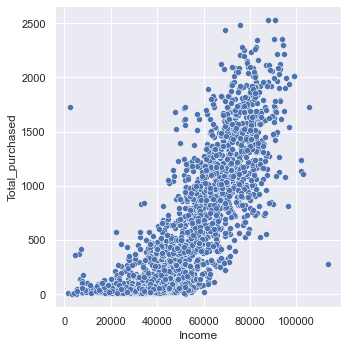

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.relplot(x ="Income", y ="Total_purchased",data = df);

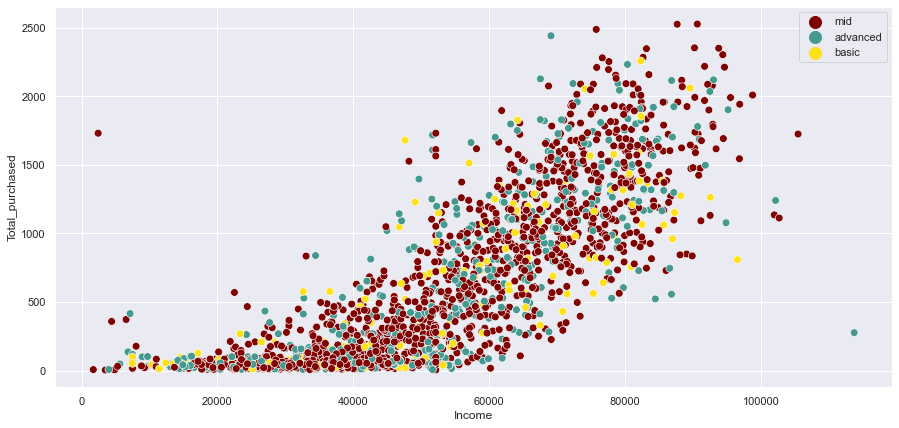

In [33]:
sns.set(rc={'figure.figsize':(15,7)})
palette = ['#800000', '#469990','#ffe119']
ax = sns.scatterplot(data = df, x=df["Income"], y=df["Total_purchased"], hue=df["Education"],s=60, palette=palette)
plt.legend(markerscale=2)
plt.show()

### Marital Status column

In [34]:
df.Marital_Status.value_counts()

Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [35]:
single_list = ['Single','Alone', 'Absurd', 'YOLO']
broken_list = ['Divorced', 'Widow']

df["Marital_Status"] = df.apply(
    lambda x: 'single' if x["Marital_Status"] in single_list else ( 'broken' if x["Marital_Status"] in broken_list else 'couple'), 
    axis=1)

df["Marital_Status"].value_counts()

couple    1443
single     486
broken     308
Name: Marital_Status, dtype: int64

### Kids/Teen column

In [36]:
df['Total_children'] =  df['Kidhome'] + df['Teenhome']
print (df.Total_children.min())
print (df.Total_children.max())

df['Has_kids'] = df.apply( lambda x: 1 if x["Total_children"] > 0  else 0, axis=1)
df['Has_kids']

0
3


0       0
1       1
2       0
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: Has_kids, Length: 2237, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='Total_purchased'>

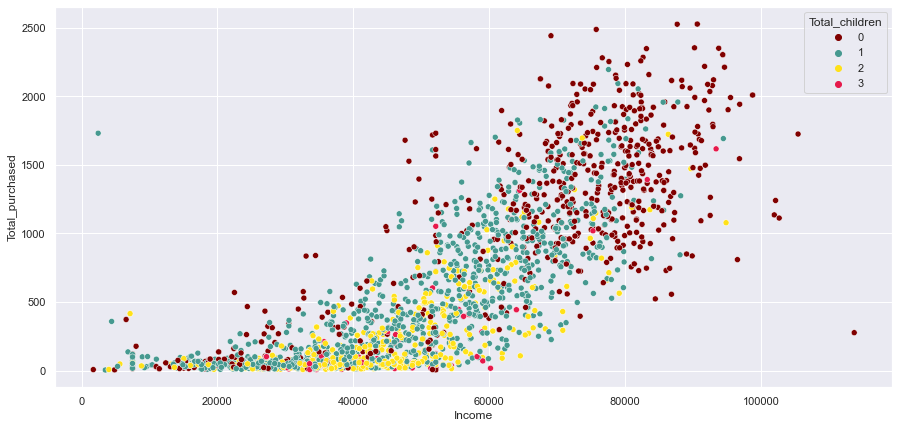

In [37]:
import seaborn as sns

# Draw the scatter plot
sns.set(rc={'figure.figsize':(15,7)})
palette = ['#800000', '#469990','#ffe119', '#e6194B']
sns.scatterplot(data = df, x=df["Income"], y=df["Total_purchased"], hue=df["Total_children"], palette =palette)

* Family without children earned more and also spent more on shopping .
* Families with 1 children earned and spent in low to medium level
* Families with 2 children and above spent very less on shopping 

### Family size

In [62]:
#Feature for total members in the householde
df["Family_size"] = df["Marital_Status"].replace({"single": 1, "broken": 1,"couple":2})+ df["Total_children"]
print (df.Family_size.min())
print (df.Family_size.max())

1
5


<AxesSubplot:xlabel='Income', ylabel='Total_purchased'>

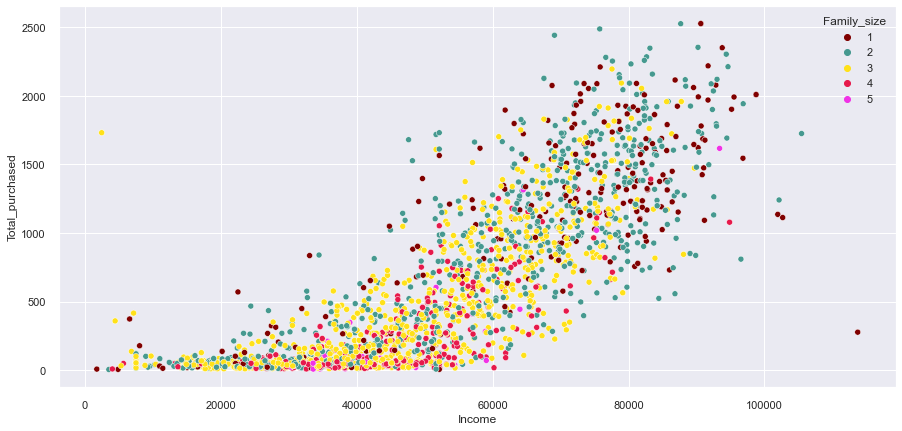

In [63]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,7)})
palette = ['#800000', '#469990','#ffe119', '#e6194B','#f032e6' ]
sns.scatterplot(data = df, x=df["Income"], y=df["Total_purchased"], hue=df["Family_size"], palette =palette)

* The amount spent in shopping decreases as the family size increases 

In [64]:
campaign_list = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

for i in campaign_list:
    print(i)
    print(df[i].value_counts())

AcceptedCmp1
0    2093
1     144
Name: AcceptedCmp1, dtype: int64
AcceptedCmp2
0    2207
1      30
Name: AcceptedCmp2, dtype: int64
AcceptedCmp3
0    2074
1     163
Name: AcceptedCmp3, dtype: int64
AcceptedCmp4
0    2070
1     167
Name: AcceptedCmp4, dtype: int64
AcceptedCmp5
0    2075
1     162
Name: AcceptedCmp5, dtype: int64
Response
0    1903
1     334
Name: Response, dtype: int64


* The campaign acceptence rate is relatively poor, campaign strategy should be changed, to impress the customer

In [65]:
df['Total_Cmp'] = df['AcceptedCmp1']+ df['AcceptedCmp2']+ df[ 'AcceptedCmp3']+ df[ 'AcceptedCmp4']+ df['AcceptedCmp5']+ df['Response']
df['NumDealsPurchases'].value_counts()

1     967
2     497
3     297
4     189
5      94
6      61
0      46
7      40
8      14
9       8
15      7
10      5
11      5
12      4
13      3
Name: NumDealsPurchases, dtype: int64

In [117]:
PURCHASE_GROUP = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

for i in PURCHASE_GROUP:
    print(df[i].value_counts())

2     372
1     353
3     336
4     279
5     220
6     205
7     155
8     102
9      75
0      49
11     44
10     43
27      2
23      1
25      1
Name: NumWebPurchases, dtype: int64
0     585
1     496
2     276
3     184
4     182
5     140
6     127
7      79
8      55
10     48
9      42
11     19
28      3
22      1
Name: NumCatalogPurchases, dtype: int64
3     490
4     322
2     221
5     212
6     178
8     149
7     143
10    125
9     106
12    105
13     83
11     81
0      15
1       7
Name: NumStorePurchases, dtype: int64


* Repeated purchases happened more in store purchase, than web purchase

In [67]:
df['Z_CostContact'].value_counts()

3    2237
Name: Z_CostContact, dtype: int64

In [68]:
df['Z_Revenue'].value_counts()

11    2237
Name: Z_Revenue, dtype: int64

## columns to drop

In [85]:
df_new = df.copy()
df_new.drop(columns=['ID','Dt_Customer', 'Year_Birth','Kidhome', 'Teenhome','total_purchased_nv','Total_purchased_fruits_swts', 
                 'Wines_Gold', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response', 
                     'Z_CostContact', 'Z_Revenue', 'Has_kids'], inplace=True)
df_new.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'No_of_days_as_customer', 'Age', 'Total_purchased',
       'Total_children', 'Total_Cmp', 'clusters', 'Family_size'],
      dtype='object')

In [86]:
df_new.dtypes

Education                  object
Marital_Status             object
Income                    float64
Recency                     int64
NumDealsPurchases           int64
NumWebPurchases             int64
NumCatalogPurchases         int64
NumStorePurchases           int64
NumWebVisitsMonth           int64
No_of_days_as_customer      int64
Age                         int64
Total_purchased             int64
Total_children              int64
Total_Cmp                   int64
clusters                    int32
Family_size                 int64
dtype: object

#### Manually encode the 2 object datatypes column

In [87]:
df_new["Marital_Status"].replace({"single": 1, "broken": 1,"couple":2}, inplace=True)
df_new["Education"].replace({"basic": 0, "mid": 1,"advanced": 2}, inplace=True)
df_new.dtypes

Education                   int64
Marital_Status              int64
Income                    float64
Recency                     int64
NumDealsPurchases           int64
NumWebPurchases             int64
NumCatalogPurchases         int64
NumStorePurchases           int64
NumWebVisitsMonth           int64
No_of_days_as_customer      int64
Age                         int64
Total_purchased             int64
Total_children              int64
Total_Cmp                   int64
clusters                    int32
Family_size                 int64
dtype: object

## Bring all the features in the same scale

Normalization vs. standardization is an eternal question among machine learning newcomers. Let me elaborate on the answer in this section.

Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

In [88]:
df_new.isnull().sum()

Education                 0
Marital_Status            0
Income                    0
Recency                   0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
No_of_days_as_customer    0
Age                       0
Total_purchased           0
Total_children            0
Total_Cmp                 0
clusters                  0
Family_size               0
dtype: int64

In [89]:
#https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(df_new)

# transform training data
df_norm = pd.DataFrame(norm.transform(df_new), columns= df_new.columns)

In [90]:
df_norm

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,No_of_days_as_customer,Age,Total_purchased,Total_children,Total_Cmp,clusters,Family_size
0,0.5,0.0,0.503625,0.585859,0.200000,0.296296,0.357143,0.307692,0.35,0.913452,0.696429,0.639683,0.000000,0.2,1.000000,0.00
1,0.5,0.0,0.398325,0.383838,0.133333,0.037037,0.035714,0.153846,0.25,0.117592,0.750000,0.008730,0.666667,0.0,0.333333,0.50
2,0.5,1.0,0.623933,0.262626,0.066667,0.296296,0.071429,0.769231,0.20,0.444026,0.553571,0.305952,0.000000,0.0,0.666667,0.25
3,0.5,1.0,0.222456,0.262626,0.133333,0.074074,0.000000,0.307692,0.30,0.061148,0.214286,0.019048,0.333333,0.0,0.000000,0.50
4,1.0,1.0,0.505009,0.949495,0.333333,0.185185,0.107143,0.461538,0.25,0.301976,0.267857,0.165476,0.333333,0.0,0.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,0.5,1.0,0.531169,0.464646,0.133333,0.333333,0.107143,0.307692,0.25,0.508937,0.517857,0.530159,0.333333,0.0,0.000000,0.50
2233,1.0,1.0,0.556087,0.565657,0.466667,0.296296,0.071429,0.384615,0.35,0.057385,0.892857,0.174206,1.000000,0.2,0.000000,1.00
2234,0.5,0.0,0.493295,0.919192,0.066667,0.074074,0.107143,1.000000,0.30,0.296331,0.267857,0.490476,0.000000,0.2,1.000000,0.00
2235,0.5,1.0,0.602791,0.080808,0.133333,0.222222,0.178571,0.769231,0.15,0.297272,0.714286,0.332540,0.333333,0.0,0.000000,0.50


## Find Best K

In [91]:
#! pip install yellowbrick
#! pip3 install scikit-learn 
#!pip install -U threadpoolctl

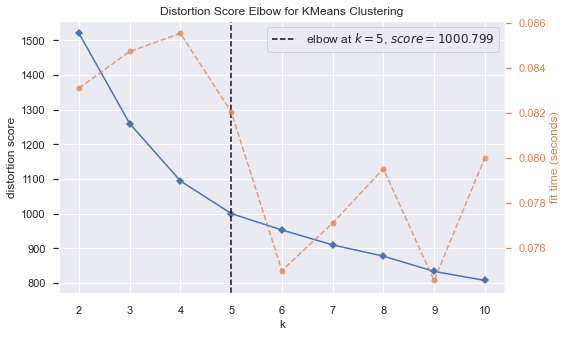

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [129]:
# Libraries for clustering and evaluation
#https://stackabuse.com/k-means-elbow-method-and-silhouette-analysis-with-yellowbrick-and-scikit-learn/
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score

plt.figure(figsize=(8, 5))

model = KMeans(random_state=42)
elb_visualizer = KElbowVisualizer(model, k=(2,11))
elb_visualizer.fit(df_norm)    
elb_visualizer.show()

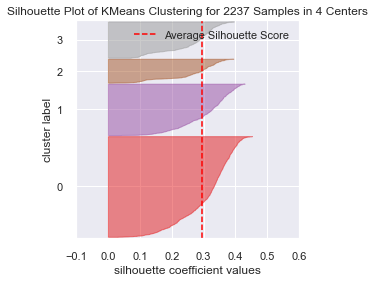

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2237 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [130]:
model_4clust = KMeans(n_clusters = 4, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(df_norm)    
sil_visualizer.show()

## KMeans Clustering

In [131]:
# using k-means to form clusters
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df_norm) #fit the data and adding back clusters to the data in clusters column

In [132]:
df['clusters'] = clusters
df['clusters'].value_counts()

0    665
4    542
3    395
2    383
1    252
Name: clusters, dtype: int64

* Cluster0 and cluster4 are the bigger clusters

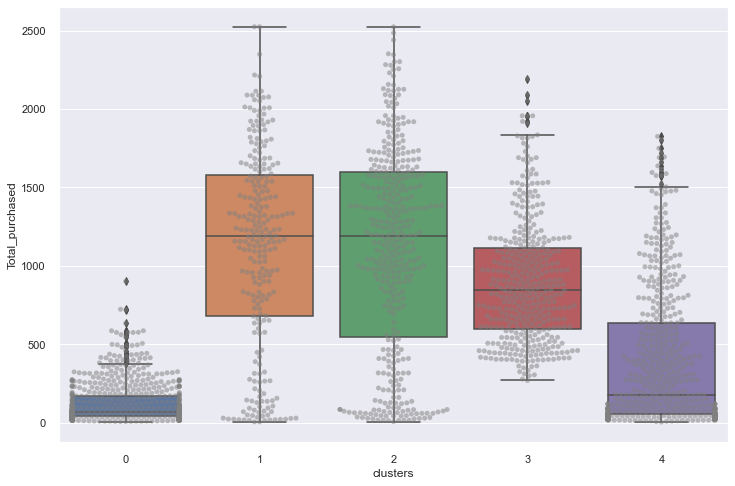

In [97]:
##https://www.geeksforgeeks.org/swarmplot-using-seaborn-in-python/
plt.figure()
pl=sns.swarmplot(x=df["clusters"], y=df["Total_purchased"], color= "grey", alpha=0.5 )
pl=sns.boxplot(x=df["clusters"], y=df["Total_purchased"])
plt.show()

Observation: Grouping customers in terms of spending
* Those spend around 250 or less are grouped in cluster 0
* Those spend 500 are grouped in cluster 4
* Those spend 500 to 1000 are grouped in cluster 3
* Those who spend more than 1000 are grouped in cluster 2 and 3

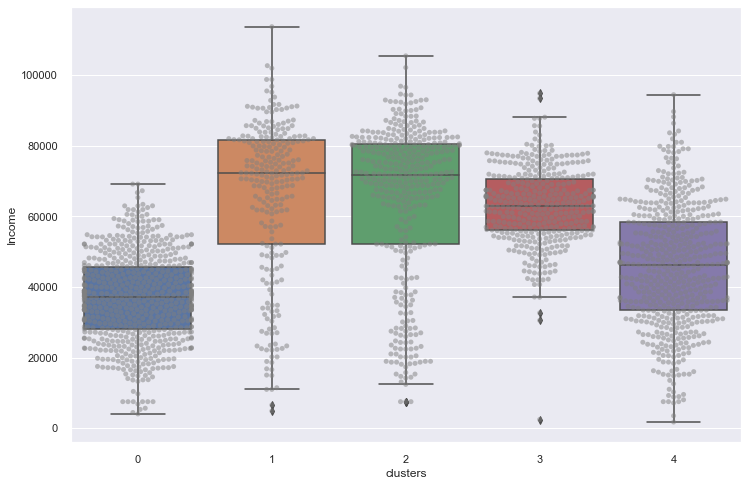

In [98]:
##https://www.geeksforgeeks.org/swarmplot-using-seaborn-in-python/
plt.figure()
pl=sns.swarmplot(x=df["clusters"], y=df["Income"], color= "grey", alpha=0.5 )
pl=sns.boxplot(x=df["clusters"], y=df["Income"])
plt.show()

Observation: Grouping customers in terms of Income
* Those earned around 35k are grouped in cluster 0
* Those earned from 35k to 60k are grouped in cluster 4
* Those earned from 60k to 80k grouped in cluster 3
* Those who earned more than 80k are grouped in cluster 2 and 3

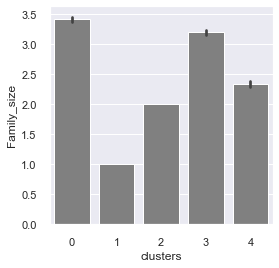

In [127]:
sns.set(rc={'figure.figsize':(4,4)})
ax = sns.barplot(data=df, x='clusters', y='Family_size', color='grey')

Observation: Grouping customers in terms of Family size
* Bigger familes are mostly grouped in cluster 0 
* Those in cluster 1 are mostly singles, without kids
* Those in cluster 2 are mostly couple or adult plus a kid

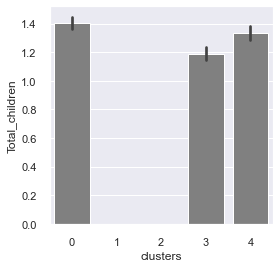

In [126]:
sns.set(rc={'figure.figsize':(4,4)})
ax = sns.barplot(data=df, x='clusters', y='Total_children', color='grey')

* Cluster 1 and 2 dont have kids
* cluster3 mostly have 1 kid

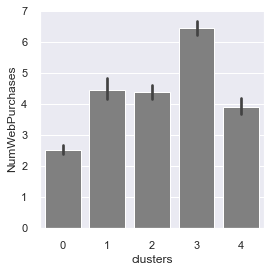

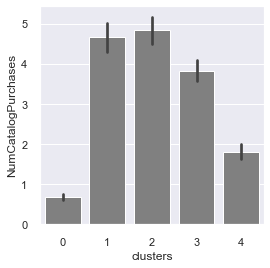

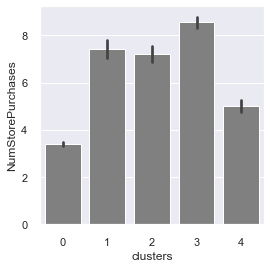

In [125]:
for i in PURCHASE_GROUP:
    sns.set(rc={'figure.figsize':(4,4)})
    ax = sns.barplot(data=df, x='clusters', y=i, color='grey')
    plt.show()

## Conclusion

The following information are derived from the clustering 

* cluster0 belong to big families with 2 or more kids, are from lower income group with less spending habit
* cluster4 contains family size of 2, widowed or divorced with 1 or 2 kids, with slightly higher income and slightly higher spending habit than cluster0
* cluster3 contains couples with mostly 1 kid, with higher income and spending habit compared to cluster0 and 4 but lesser than cluster1 and 2 in both income and spending habit
* cluster1 contains only singles, are from the highest income group and with highest spending habits
* cluster2 contains only couples, with income closer to cluser1 and spending habit closer to cluster1
      
* 75% of the customers belong to cluster0, cluster4 and cluster3, 25 percent of the customer belong to cluster1 and cluster2